# OSMOSIS 2019 

Topic: Movie Poster To Genre


In [1]:
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
import requests

movies = pd.read_csv("./MovieGenre.csv", encoding="ISO-8859-1")

#print(movies.columns)

length = len(movies)
print("Total Number Of Movies:" + str(length))


#try:
#    os.makedirs("/Movie_Posters")
#except OSError:
#    print("Creation of path failed")
#else:
#    print("Folder successfully created!")

#for i in range(0, length+1):
#   try:
#        img_data = requests.get(movies.loc[i]['Poster']).content
#    except:
#        print('No URL Provided')
#    else:
#        img_name = './Movie_Posters/' +str(movies.loc[i]['imdbId'])+'.jpg'
#        print(str(i)+" "+"Saving Image" + img_name)
#        with open(img_name, 'wb') as handler:
#            handler.write(img_data)

#print(movies.loc[1]['Title'])


Total Number Of Movies:40108


#### The First 10 records fetched using pandas with their corresponding posters.

In [2]:
for i in range(0, 10):
    print(str(i)+" "+str(movies.loc[i]))
    
    try:
        img_data = requests.get(movies.loc[i]['Poster']).content
    except:
        print('No URL Provided')
    else:
        img_name = './Posters_Checkpoint1/' +str(movies.loc[i]['imdbId'])+'.jpg'
        print(str(i)+" "+"Saving Image" + img_name+"\n")
        with open(img_name, 'wb') as handler:
            handler.write(img_data)

0 imdbId                                                   114709
Imdb Link                    http://www.imdb.com/title/tt114709
Title                                          Toy Story (1995)
IMDB Score                                                  8.3
Genre                                Animation|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 0, dtype: object
0 Saving Image./Posters_Checkpoint1/114709.jpg

1 imdbId                                                   113497
Imdb Link                    http://www.imdb.com/title/tt113497
Title                                            Jumanji (1995)
IMDB Score                                                  6.9
Genre                                   Action|Adventure|Family
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 1, dtype: object
1 Saving Image./Posters_Checkpoint1/113497.jpg

2 imdbId                                                   113228
Imdb Link           

#### The Last 10 records fetched using pandas with their corresponding posters.

In [3]:
for i in range(length-10, length):
    print(str(i)+" "+str(movies.loc[i]))
    
    try:
        img_data = requests.get(movies.loc[i]['Poster']).content
    except:
        print('No URL Provided')
    else:
        img_name = './Posters_Checkpoint1/' +str(movies.loc[i]['imdbId'])+'.jpg'
        print(str(i)+" "+"Saving Image" + img_name+"\n")
        with open(img_name, 'wb') as handler:
            handler.write(img_data)

40098 imdbId                                                   229480
Imdb Link                    http://www.imdb.com/title/tt229480
Title                                    Island of Blood (1982)
IMDB Score                                                  4.7
Genre                                   Horror|Mystery|Thriller
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 40098, dtype: object
40098 Saving Image./Posters_Checkpoint1/229480.jpg

40099 imdbId                                                    93991
Imdb Link                     http://www.imdb.com/title/tt93991
Title                   Slave Girls from Beyond Infinity (1987)
IMDB Score                                                  4.5
Genre                                   Action|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 40099, dtype: object
40099 Saving Image./Posters_Checkpoint1/93991.jpg

40100 imdbId                                                   

#### Next We will Analyse the Data Distribution

In [3]:
genre_list = []
mov_mul_genre = []

for n in range(0, length):
    genres = str(movies.loc[n]['Genre'])
    if '|' in genres:
        mov_mul_genre.append(str(movies.loc[n]['Title']))
    genres_l = genres.split('|')
    genre_list.extend(genres_l)
    
unique_genres = list(set(genre_list))
    
print("Total Number of Unique Genres are: " + str(len(unique_genres)))

print("Total Number of Movies With Multiple Genres: " + str(len(mov_mul_genre)))

Total Number of Unique Genres are: 29
Total Number of Movies With Multiple Genres: 29365


#### Number of movies from each genre

Documentary: 3882
Comedy: 12682
Adult: 14
Action: 5331
Mystery: 2395
Talk-Show: 7
Drama: 20053
Biography: 1999
War: 1173
Western: 853
Reality-TV: 2
Adventure: 3829
History: 1426
Crime: 5270
Animation: 1750
Music: 1292
Thriller: 4816
Romance: 6224
News: 83
Short: 1066
Fantasy: 2012
Film-Noir: 403
nan: 145
Sci-Fi: 2020
Musical: 845
Family: 2100
Sport: 707
Game-Show: 1
Horror: 3990


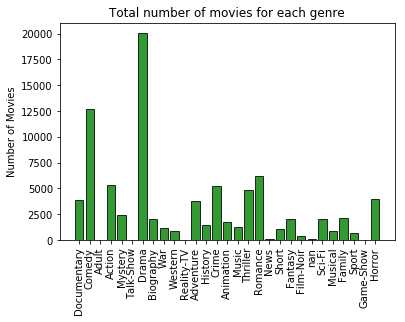

In [4]:
cnt_list = []

for gnr in unique_genres:
    cnt = genre_list.count(gnr)
    cnt_list.append(cnt)
    print(gnr + ": " + str(cnt))
    
#Creating a Bar Graph to represent the data

y_axis = np.arange(len(unique_genres))
plt.bar(y_axis, cnt_list, align='center', alpha=0.8, color='green', edgecolor='black')
plt.xticks(y_axis, unique_genres, rotation='vertical')
plt.ylabel('Number of Movies')
plt.title('Total number of movies for each genre')
plt.show()

In [14]:
import os
import glob
from sklearn.preprocessing import MultiLabelBinarizer
import scipy
import scipy.misc

img_paths = glob.glob("./Posters_Checkpoint1/*.jpg")
img_ids = []
y = []
x = []

for path in img_paths:
    try:
        image = plt.imread(path)
    except:
        print("Error in reading image!")
    else:
        image = scipy.misc.imresize(image, (150, 150))
        image = image.astype(np.float32)
        x.append(image)
        start = path.rfind("/")+1
        end = len(path)-4
        img_ids.append(path[start:end])
x = np.asarray(x)

classes = tuple()

for img_id in img_ids:
    img_genres = tuple((movies[movies["imdbId"] == int(img_id)]["Genre"].values[0]).split("|"))
    y.append(img_genres)
    
    classes = classes + img_genres

mlb = MultiLabelBinarizer()
mlb.fit(y)
y = mlb.transform(y)
classes = set(classes)
print(x)

Error in reading image!
Error in reading image!
[[[[248. 236. 210.]
   [248. 236. 210.]
   [247. 235. 209.]
   ...
   [249. 236. 204.]
   [249. 236. 204.]
   [249. 236. 204.]]

  [[252. 240. 214.]
   [251. 239. 213.]
   [250. 238. 212.]
   ...
   [251. 238. 206.]
   [251. 238. 206.]
   [251. 238. 206.]]

  [[251. 239. 213.]
   [251. 239. 213.]
   [250. 238. 212.]
   ...
   [253. 240. 208.]
   [253. 240. 208.]
   [253. 240. 208.]]

  ...

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]]


 [[[170. 209.  68.]
   [172. 213.  65.]
   [174. 216.  61.]
   ...
   [168. 217.  62.]
   [170. 219.  64.]
   [169. 218.  64.]]

  [[172. 219.  65.]
   [170. 218.  63.]


/home/saswata/anaconda3/envs/osmosis2/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


ModuleNotFoundError: No module named 'tensorflow'